In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from math import ceil, floor
from clusterlensing import ClusterLensing

In [7]:
fits_filex='GCdata/Abell2744/hlsp_frontier_model_abell2744_williams_v4_x-pixels-deflect.fits'
fits_filey='GCdata/Abell2744/hlsp_frontier_model_abell2744_williams_v4_y-pixels-deflect.fits'
img_file='GCdata/Abell2744/hlsp_frontier_model_abell2744_williams_v4_kappa.fits'
mag_file='GCdata/Abell2744/hlsp_frontier_model_abell2744_williams_v4_z01-magnif.fits'
hdul = fits.open(fits_filex)
hdul1 = fits.open(fits_filey)
hdul_mag = fits.open(mag_file)
hdul_img = fits.open(img_file)


In [3]:
pixscale = 0.25
datax = hdul[0].data

datay = hdul1[0].data

data_img = hdul_img[0].data

#array_data = np.zeros((datax.shape[0],datax.shape[1]))
#array_data[100:160, 100:160]=datax[100:160, 100:160]

data_mag = hdul_mag[0].data
hdul.close()
hdul1.close()
hdul_img.close()

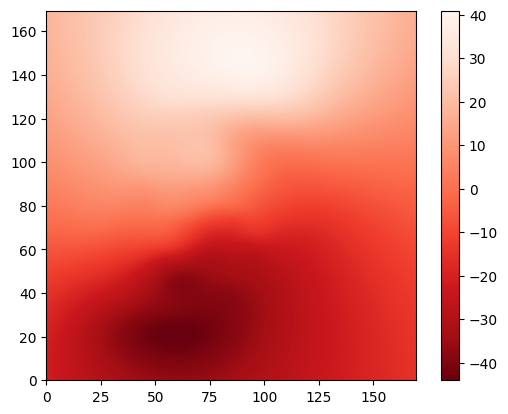

In [4]:
size = datax.shape[0]
datax = datax * pixscale
datay = datay * pixscale
plt.imshow(datay, cmap='Reds_r',extent=[0, size*pixscale, size*pixscale,0 ])
plt.gca().invert_yaxis()
datax = datax / pixscale
datay = datay / pixscale
plt.colorbar()

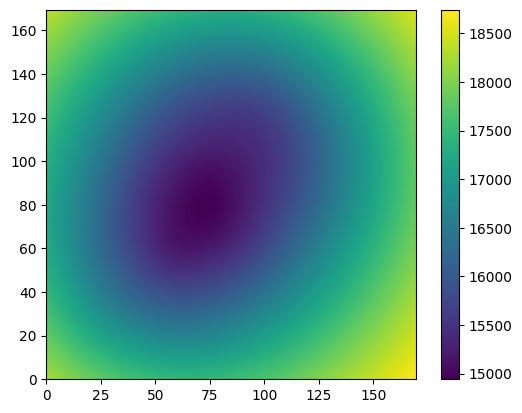

In [5]:
# psi map
psi = 'hlsp_frontier_model_abell2744_williams_v4_psi.fits'
hdul_psi = fits.open(psi)
data_psi = hdul_psi[0].data
data_psi_arcsec = data_psi * pixscale**2
hdul_psi.close()
plt.imshow(data_psi_arcsec, cmap='viridis', extent=[0, size*pixscale, size*pixscale,0 ])
plt.gca().invert_yaxis()
plt.colorbar()

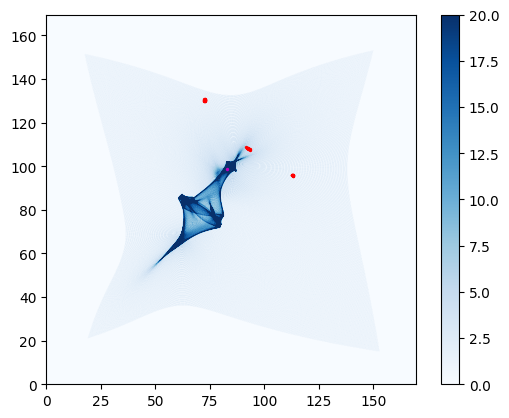

In [6]:
size = datax.shape[0]

array_test = np.zeros((size,size))
img_coord_in_src_coord = [[[] for _ in range(678)] for _ in range(678)]
for i in range(0,678):
    for j in range(0,678):
        ycoord = i-datay[i,j]
        xcoord = j-datax[i,j]
        ydec = ycoord%1
        xdec = xcoord%1
        xfloor = floor(xcoord)
        yfloor = floor(ycoord)
        #array_test[ceil(ycoord),ceil(xcoord)] += data_img[i,j]*ydec*xdec
        #array_test[ceil(ycoord),floor(xcoord)] += data_img[i,j]*ydec*(1-xdec)
        #array_test[floor(ycoord),ceil(xcoord)] += data_img[i,j]*(1-ydec)*xdec
        array_test[yfloor,xfloor] += 1
        #img_coord_in_src_coord[floor(ycoord)][floor(xcoord)].append([i,j])


#gaussian circle
'''mean = [260, 330] #(x,y)
cov = [[40, 0], [0, 40]]

# Generate a grid of (x, y) coordinates
x, y = np.meshgrid(np.linspace(0, size, size), np.linspace(0, size, size))

# Generate a 2D Gaussian distribution over the grid
d = np.dstack([x, y])
gaussian_circle = np.exp(-0.5 * (np.einsum('...k,kl,...l->...', d - mean, np.linalg.inv(cov), d - mean)))
circle_coords = np.argwhere(gaussian_circle > 0.5)

# radius
from scipy.ndimage import distance_transform_edt as distance
radius = max(circle_coords[:,1])-mean[0]
print(f'Radius: {radius}')'''



'''#specific method for perfect circle
for i in range(size):
    for j in range(size):
        ycoord = i-datay[i,j]
        xcoord = j-datax[i,j]
        if ycoord<0 or ycoord>677 or xcoord<0 or xcoord>677:
            continue
        dist = np.sqrt((ycoord-center[1])**2+(xcoord-center[0])**2)
        if dist <= radius:
            scatterx.append(j)
            scattery.append(i)
            n+=1'''
            
# point source            
coord = (332.2,394.4)
coord_x_r, coord_y_r = coord[0] % 1, coord[1] % 1
y_round, x_round = round(coord[1]), round(coord[0])

# Pre-calculate possible matching rounded values for efficiency
y_possible_rounds = {y_round, y_round - 1} if coord_y_r == 0.5 else {y_round}
x_possible_rounds = {x_round, x_round - 1} if coord_x_r == 0.5 else {x_round}

coordinates = []
n = 0

# Iterate over a pre-defined range, assuming alpha_y_2d and alpha_x_2d are indexed appropriately
for i in range(size):
    for j in range(size):
        ycoord, xcoord = i - datay[i, j], j - datax[i, j]
        if round(ycoord) in y_possible_rounds and round(xcoord) in x_possible_rounds:
            coordinates.append((j, i))  # (x, y)
            n += 1

plt.scatter([i[0] * pixscale for i in coordinates], [i[1] * pixscale for i in coordinates], c='r', s=2)
plt.scatter(coord[0]* pixscale, coord[1]* pixscale, c='m', s=2)
plt.imshow(array_test, cmap='Blues', vmax = 20, extent=[0, size*pixscale, size*pixscale,0 ])
plt.gca().invert_yaxis()
plt.colorbar()
print()

In [1]:
fits_filex_arcsec='GCdata\hlsp_frontier_model_abell2744_williams_v4_x-arcsec-deflect.fits'
fits_filey_arcsec='GCdata\hlsp_frontier_model_abell2744_williams_v4_y-arcsec-deflect.fits'
hdul_arcsec_x = fits.open(fits_filex_arcsec)
hdul_arcsec_y = fits.open(fits_filey_arcsec)
datax_arcsec = hdul_arcsec_x[0].data
datay_arcsec = hdul_arcsec_y[0].data
hdul_arcsec_x.close()
hdul_arcsec_y.close()
cluster = ClusterLensing(datax_arcsec, datay_arcsec, data_psi_arcsec, 0.5,1.0,pixscale, 678)

NameError: name 'fits' is not defined

[(25.0452757438365, 96.30394224966155), (62.87531746485501, 45.81923450717466), (63.5647970446397, 52.27263523523918), (70.3500692972721, 59.92729870667086), (78.41485861569093, 72.34180585759087), (80.38950840721091, 51.4781242909049), (89.83823507230913, 71.45908220957455)]


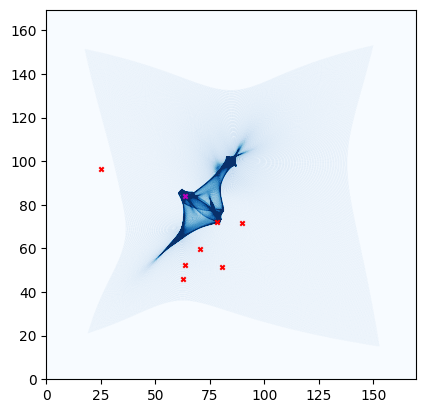

In [13]:
coord = (63.8, 84.1)
theta = cluster.get_image_positions(coord[0], coord[1])
print(theta)
plt.imshow(array_test, cmap='Blues', vmax = 20, extent=[0, size*pixscale, size*pixscale,0 ])
plt.scatter([i[0] for i in theta], [i[1]for i in theta], c='r', s=10, marker='x')
plt.scatter(coord[0], coord[1], c='m', s=10, marker='x')
plt.gca().invert_yaxis()

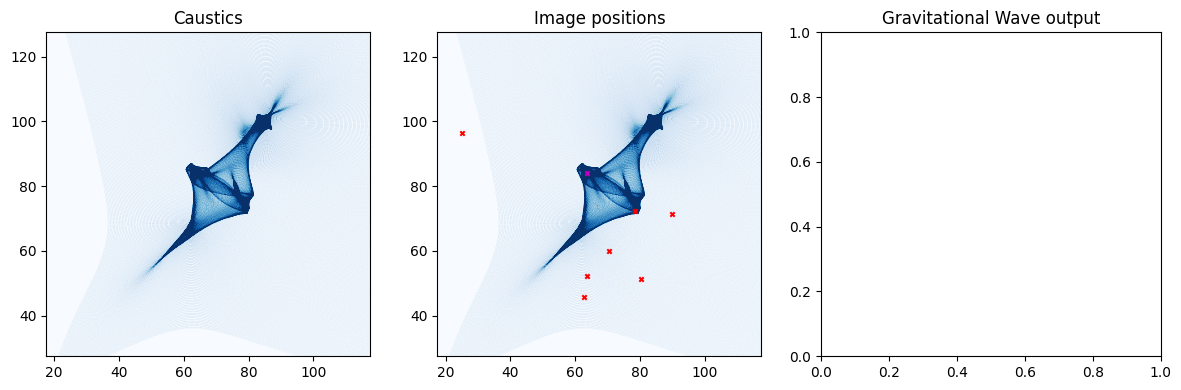

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the caustics in the first subplot
im1 = axes[0].imshow(array_test, cmap='Blues', vmax=20, extent=[0, 678* 0.25, 678* 0.25, 0])
axes[0].set_title('Caustics')
axes[0].invert_yaxis()
axes[0].set_xlim(270*0.25-50,270*0.25+50)
axes[0].set_ylim(310*0.25-50,310*0.25+50)

# Plot the magnification image in the second subplot
im2 = axes[1].imshow(array_test, cmap='Blues', vmax = 20, extent=[0, 678* 0.25, 678* 0.25, 0])
axes[1].invert_yaxis()
axes[1].set_title('Image positions')
axes[1].scatter([i[0] for i in theta], [i[1]for i in theta], c='r', s=10, marker='x')
axes[1].scatter(coord[0], coord[1], c='m', s=10, marker='x')

axes[1].set_xlim(270*0.25-50,270*0.25+50)
axes[1].set_ylim(310*0.25-50,310*0.25+50)
# Show gravitational wave figure
axes[2].set_title('Gravitational Wave output')

plt.tight_layout()
plt.show()

In [10]:
# time delay
kwargs_len = [{'grid_interp_x': x_grid, 'grid_interp_y': y_grid, 'f_x': datax_arcsec, 'f_y': datay_arcsec, 'f_': data_psi_arcsec}]
lens_model1 = LensModel(lens_model_list= lens_model_list, z_source=1.0, z_lens=0.5)
print("lenstronomy time delay:")
t_array = []

for i in range(len(theta)):
    dt = lens_model1.arrival_time(theta[i][0] / pixscale, theta[i][1]/pixscale, kwargs_len)
    t_array.append(dt)
min_t = min(t_array)
dt_array = np.array(t_array) - min_t
print(dt_array)

dt = cluster.get_time_delays()['delta_t(days)'].values
print("my time delay:")
print(np.sort(dt))

lenstronomy time delay:
[2606.2016805  5145.47811311    0.        ]
my time delay:
[   0.         2519.58749474 4974.47392472]


In [22]:
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
solver = LensEquationSolver(lens_model1)
thetax, thetay = solver.image_position_from_source(coord[0], coord[1], kwargs_len, x_center=coord[0], y_center= coord[1], search_window = 200)
print(thetax, thetay)
print(cluster.get_image_positions())

[341.55175362] [407.49204761]
[(112.98487095258845, 95.97231710162978), (92.88998072819356, 108.09972191209015), (72.85005323394664, 130.68149311732964)]


In [23]:
#comparing time
import time
start = time.time()
cluster.get_time_delays()
end = time.time()
print("Time taken for my time delay: ", end-start)
start = time.time()
theta = np.array(cluster.get_image_positions())
lens_model1.arrival_time(theta[0][0] / pixscale, theta[0][1]/pixscale, kwargs_len)
end = time.time()
print("Time taken for lenstronomy time delay: ", end-start)


Time taken for my time delay:  2.4667422771453857
Time taken for lenstronomy time delay:  2.2106680870056152


Number of pixels: [9, 10, 13]


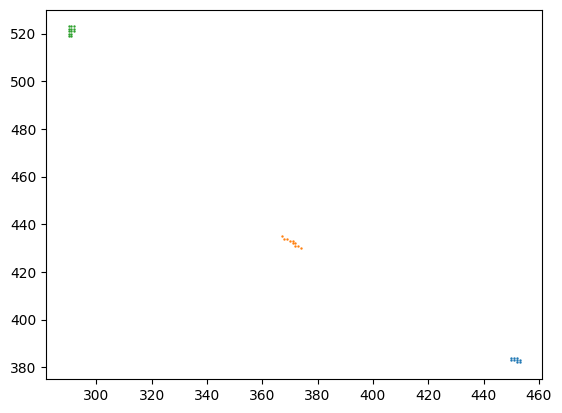

In [9]:
#Clustering
from sklearn.cluster import DBSCAN

coordinates = np.array(coordinates) #data in pixel

# Apply DBSCAN clustering
# eps and min_samples need to be chosen based on your specific data
dbscan = DBSCAN(eps=6, min_samples=1).fit(coordinates)

# Extract labels
labels = dbscan.labels_

# Separate coordinates into arrays for each image
images = {}
for label in set(labels):
    if label != -1:  # Ignore noise points
        images[f"Image_{label}"] = coordinates[labels == label]

# images now contains separate arrays for each detected image
# convert the dictionary images to list
images = list(images.values())

for i in range(0, len(images)):
    plt.scatter(images[i][:,0], images[i][:,1], s=0.5)
print(f'Number of pixels: {[np.sum(len(images[i])) for i in range(0, len(images))]}')

In [10]:
datax = np.array(datax, dtype=np.float64)
datay = np.array(datay, dtype=np.float64)
# interpolate the deflected angle given the image pos
def def_angle_test_interpolate(x,y, alpha_x= datax, alpha_y = datay):  #(x,y) is img_guess
    dx = x - floor(x)
    dy = y - floor(y)
    top_left = np.array([alpha_x[ceil(y), floor(x)], alpha_y[ceil(y), floor(x)]]) #to match (y,x) of alpha grid
    top_right = np.array([alpha_x[ceil(y), ceil(x)], alpha_y[ceil(y), ceil(x)]])
    bottom_left = np.array([alpha_x[floor(y), floor(x)], alpha_y[floor(y), floor(x)]])
    bottom_right = np.array([alpha_x[floor(y), ceil(x)], alpha_y[floor(y), ceil(x)]])
    top = top_left * (1 - dx) + top_right * dx
    bottom = bottom_left * (1 - dx) + bottom_right * dx
    alpha = top * dy + bottom *(1 - dy)
    src_guess = np.array([x-alpha[0], y-alpha[1]])
    return src_guess, alpha
                                             
def diff_interpolate (img_guess):
    src_guess = def_angle_test_interpolate(img_guess[0],img_guess[1])[0]
    return np.sqrt((src_guess[0]-coord[0])**2 + (src_guess[1]-coord[1])**2)
alpha = def_angle_test_interpolate(291.40020377, 522.72600263)[1]
print(f"{alpha[0]:.8f}, {alpha[1]:.8f}")


-40.79979179, 128.32599538


In [9]:
cluster.get_image_positions()

[(112.9848709520881, 95.97231710144999),
 (92.88998072528092, 108.09972191516881),
 (72.85005323510086, 130.68149311793943)]

NameError: name 'images' is not defined

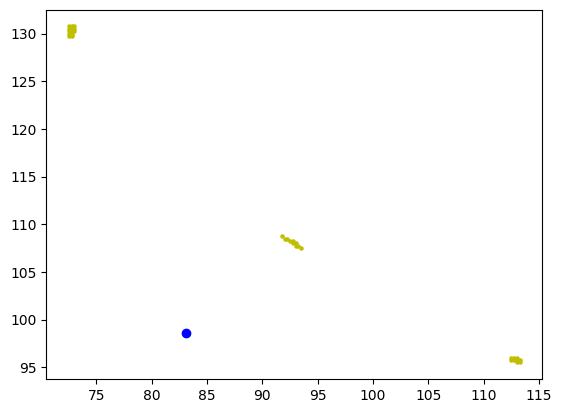

In [10]:
import scipy.optimize._minimize as minimize
# minimum distance between the source position and the guess source positions deflected by mutiple images
# expect partition of the images and search for 1 sol for 1 image
plt.scatter(coord[0]* pixscale, coord[1]* pixscale, c='b')
plt.scatter([i[0]* pixscale for i in coordinates], [i[1]* pixscale for i in coordinates], c='y', s=5)
# find maximum x and y coordinates of the image[i]
img = [[] for _ in range(len(images))]
for i in range(len(images)):
    x_max, x_min = np.max(images[i][:,0]), np.min(images[i][:,0])
    y_max, y_min = np.max(images[i][:,1]), np.min(images[i][:,1])
    img_guess = (np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max))
    pos = minimize.minimize(diff_interpolate, img_guess, bounds =[(x_min-2, x_max+2), (y_min-2, y_max+2)], method='L-BFGS-B', tol=1e-7) # the 1 is for wider boundary
    print(x_min* pixscale, x_max* pixscale, y_min* pixscale, y_max* pixscale, pos.x* pixscale, diff_interpolate(pos.x))
    plt.scatter(pos.x[0]* pixscale, pos.x[1]* pixscale, c='g', s=10, marker='x')
    img[i] = (pos.x[0]* pixscale, pos.x[1]*pixscale)

#fig show in arcsec


In [13]:
#magnification
image_position = np.array(img)/ pixscale
def calculate_magnification(theta, h=1e-9):
    """
    Calculate the magnification at a given image position theta.
    
    :param theta: Image position (2D numpy array)
    :param h: Step size for numerical differentiation
    :return: Magnification
    """
    # Compute partial derivatives

    def partial_derivative(func, var, point): 
        args = point[:]
        def wraps(x):
            args[var] = x
            return func(args)
        
        #print(wraps(point[var]+h), wraps(point[var]-h))
       
        return lambda x: (wraps(x+h) - wraps(x-h))/(2*h) # central difference diff fct

    def alpha(t):
        alpha = def_angle_test_interpolate(t[0], t[1])[1]
        a = float(f"{alpha[0]:.12f}")
        b = float(f"{alpha[1]:.12f}")
        return np.array([a, b])
    
    magnification = []
    for theta in enumerate(theta):
        dalpha1_dtheta1 = partial_derivative(lambda t: alpha(t)[0], 0, theta[1])(theta[1][0])
        dalpha1_dtheta2 = partial_derivative(lambda t: alpha(t)[0], 1, theta[1])(theta[1][1])
        dalpha2_dtheta1 = partial_derivative(lambda t: alpha(t)[1], 0, theta[1])(theta[1][0])
        dalpha2_dtheta2 = partial_derivative(lambda t: alpha(t)[1], 1, theta[1])(theta[1][1])
        #print(dalpha1_dtheta1, dalpha1_dtheta2, dalpha2_dtheta1, dalpha2_dtheta2)

        # Construct the magnification tensor
        A = np.array([
            [1 - dalpha1_dtheta1, -dalpha1_dtheta2],
            [-dalpha2_dtheta1, 1 - dalpha2_dtheta2]
        ])
    
        # Calculate magnification
        magnification.append(1 / np.linalg.det(A))
    
    return magnification

# Example usage

calculate_magnification(image_position)






[9.407574704143029, -9.499582510244608, 10.415004335531089]

In [14]:
theta = img   #in arcsec

beta = np.array(coord) * pixscale #arcsec
def psi_interpolate(x,y, psi = data_psi_arcsec):  #(x,y) is img_guess
    x = x/pixscale
    y = y/pixscale
    dx = x - floor(x)
    dy = y - floor(y)
    top_left = np.array(psi[ceil(y), floor(x)]) #to match (y,x) of alpha grid
    top_right = np.array(psi[ceil(y), ceil(x)])
    bottom_left = np.array(psi[floor(y), floor(x)])
    bottom_right = np.array(psi[floor(y), ceil(x)])
    top = top_left * (1 - dx) + top_right * dx
    bottom = bottom_left * (1 - dx) + bottom_right * dx
    psi = top * dy + bottom *(1 - dy)
    return psi

def fermat_potential(theta, beta):
    return 0.5 * (np.linalg.norm(theta - beta)**2) - psi_interpolate(theta[0], theta[1])

for i in range(len(theta)):
    print(f"Interpolation Fermat potential at {theta[i]}: {fermat_potential(np.array(theta[i]), beta)}")

# time delay by diff of fermat potentials and scale it by time-delay distance
dt = []
for i in range(len(theta)):
    dt.append(fermat_potential(np.array(theta[i]), beta) - fermat_potential(np.array(theta[0]), beta))
    print(f"demensionless time delay at {theta[i]}: {dt[i]}")

Interpolation Fermat potential at (112.98487094053488, 95.9723171475585): -15321.10239674774
Interpolation Fermat potential at (92.88998063657552, 108.09972196559573): -15301.217603601517
Interpolation Fermat potential at (72.85005327244554, 130.68149310609476): -15341.511274139877
demensionless time delay at (112.98487094053488, 95.9723171475585): 0.0
demensionless time delay at (92.88998063657552, 108.09972196559573): 19.884793146222364
demensionless time delay at (72.85005327244554, 130.68149310609476): -20.408877392137583


In [31]:
from astropy.cosmology import FlatLambdaCDM
import lenstronomy.Util.constants as const

# Redshifts
z_L = 0.5
z_S = 1.0

# Calculate distances
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
D_L = cosmo.angular_diameter_distance(z_L)
D_S = cosmo.angular_diameter_distance(z_S)
D_LS = cosmo.angular_diameter_distance_z1z2(z_L, z_S)
#print(D_LS)
time_delay_distance = (1 + z_L) * D_L * D_S / D_LS * const.Mpc
print(f"Time-delay distance: {time_delay_distance.value}")
dt_days = np.array(dt) * time_delay_distance.value / const.c / const.day_s * const.arcsec ** 2
print(f"Numerical time delay in days: {dt_days} days")

Time-delay distance: 1.3604890145694932e+26
Numerical time delay in days: [    0.          2454.8864295  -2519.58749451] days
